# Exercise Sheet 1 – Machine Learning Basics

 * Deep Learning – Winter term 2019/20
 * Instructor: Alexander Ecker
 * Tutors: Osman Kaya, Eren Yildiz, Florian Teich
 * Due date: Dec 19, 2019 at noon


# IMPORTANT SUBMISSION INSTRUCTIONS

- When you're done, download the notebook and rename it to \<surname1\>_\<surname2\>_\<surname3\>.ipynb
- Only submit the ipynb file, no other file is required
- Submit only once
- The deadline is strict
- You are required to present your solution in the tutorial; submission of the notebook alone is not sufficient

Implementation
- Do not add any "import" lines apart from what is already given.
- Do not change the cells which are marked as "Do not change", similarly write your solution to the marked cells.


## Introduction

In this task you will get to know the basic tools used by the machine learning community. Jupyter Notebooks, Numpy, Scipy and Matplotlib are the required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:


*   [Matplotlib Tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
*   [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/)
*   [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)
*   [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)


NOTE: **Do not add any "import" lines apart from what is already given.**



# MNIST Dataset
This dataset contains handwritten digits, and it is widely used by the machine learning community. It's really useful that you get accustomed with this dataset, as you'll come across later under other concepts. Let's have some understanding of the data inside. 


Create a plot that looks like the following one:
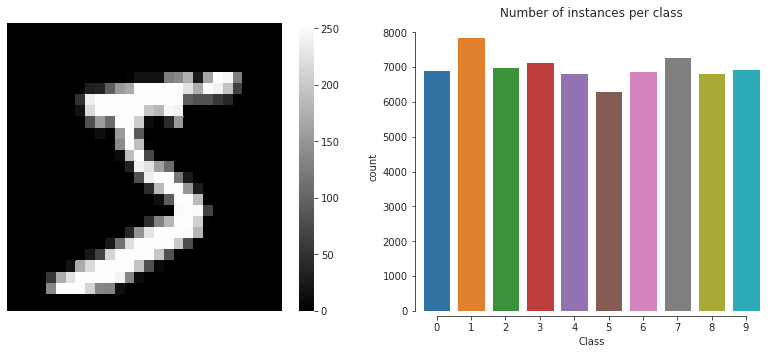

Note the details (subplots, labels, titles, colormaps, etc...)!


## imports

Jupyter notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

In [0]:
import numpy as np
from sklearn.datasets import fetch_openml
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt

Download MNIST dataset

In [0]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = np.array(y, dtype=int)

Let's check the first ten samples to see what they look like

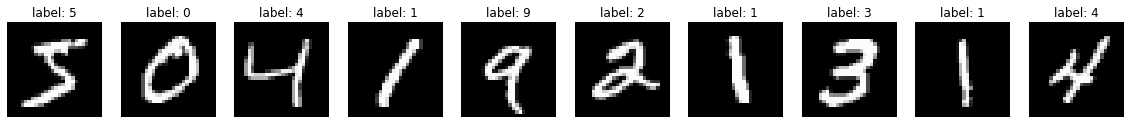

In [0]:
N = 10
fig, axes = plt.subplots(1, N, figsize=(2*N, 2))
for ax, image, label in zip(axes.ravel(), X, y):
  ax.set_title("label: {}".format(label))
  ax.axis('off')
  ax.imshow(image.reshape(28,28), cmap='gray') # Remember, images are 28x28

# Gradient Descent, Logistic Regression & Regularization
Now that you know what MNIST looks like, in this task you can work with the dataset to classify the handwritten digits.

## Training, Validation and Test Sets
In this assignment, we will start by splitting 30% of the data as test set for final evaluation. **Note that you should not use the test set in any part of your training and model selection procedure.** It should be only used for showing the final results.
Use the rest of the dataset for creating training and validation sets. 


In [0]:
# Prepare the lists that will contain validation set, as well as the rest (training+test)
X_test = np.zeros((0, 784))
y_test = np.array([])
X_rest = np.zeros((0, 784))
y_rest = np.array([])

# split 30% of each digit in the dataset
for i in range(10):
  idx = np.where(y == i)[0]
  
  X_test_i, X_rest_i = np.array_split(X[idx], [int(X[idx].shape[0] * 0.3)])
  X_test = np.r_[X_test, X_test_i]
  X_rest = np.r_[X_rest, X_rest_i]

  y_test_i, y_rest_i = np.array_split(y[idx], [int(y[idx].shape[0] * 0.3)])
  y_test = np.r_[y_test, y_test_i]
  y_rest = np.r_[y_rest, y_rest_i]



- Split the rest of the data (X_rest, y_rest) into training and validation sets.


In [0]:
# TODO

### Binary classification

- Implement a binary classifier using gradient descent for seperating digits 1 and 7. (Ignore the other digits for this part).

- Your model should be $\hat y = \sigma(w^T x)$ where $x$ is the input image (vectorized), $w$ is the weight vector and $\sigma(x) = \frac{1}{1+e^{-x}}$

- Use the cross-entropy loss function, which is $E(y,\hat{y}) = \sum_i{}y_ilog(\hat{y}_i)$

In [0]:
# TODO



- Show the weights as an image for every $k$ iteration (note that, each weight corresponds to a pixel, choose a sensible $k$ which would show the progress). For example, if we trained a classifier for seperating "0"s and "1"s final weights would look similar to this:

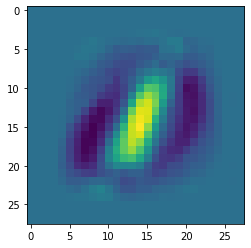 

- Show the histogram for logit distribution of the two classes on the test dataset in the format of following figure.
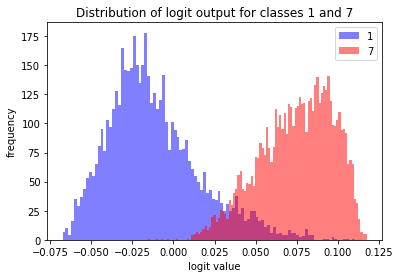

In [0]:
# TODO

- Plot the iteration vs. loss graph. Show both the loss on the training and the validation set.

In [0]:
# TODO

You should notice that your model might(or might not) overfit the data, i.e. the loss on the training set is smaller than on the validation set. Therefore we now regularize our model using $\ell_1$ or $\ell_2$ regularization (pick one or try both).

- How does regularization affect the results? Run the training to obtain the optimal regularization parameter $\in [10^{-5}, 10^{-4}, ..., 10^0]$. Plot the accuracy of the validation set as a function of regularization strength.

In [0]:
# TODO

 * Show the weight image (per class) for the regularization-run with the highest accuracy.

In [0]:
# TODO

- Report the accuracy on the test set of your best model.

In [0]:
# TODO

### 10-way Classification

For the 10-way classification, we use a one-hot encoding of the class labels. This means that ${\bf y} \in [0,1]^{10}$ is a 10-dimensional vector that is zero for all classes except the correct one. For instance, for a "0", we would have ${\bf y}=[1, 0, 0, ... 0]^T$ while for a "3" ${\bf y}=[0, 0, 0, 1, 0, ... 0]^T$.

Instead of $\sigma(x) = \frac{1}{1+e^{-x}}$ we will now use the softmax: $\sigma(x)_i = \frac{e^{x_i}}{\sum^{K}_{j=1} e^{x_j}}$ for all $i=1, ..., K$ classes. Can you show analytically that the softmax reduces to the logistic function for $K=2$?

In [0]:
# TODO

- Plot the normalized confusion matrix using seaborn similar to the following format. Put the overall accuracy in the title. (Use test set.)
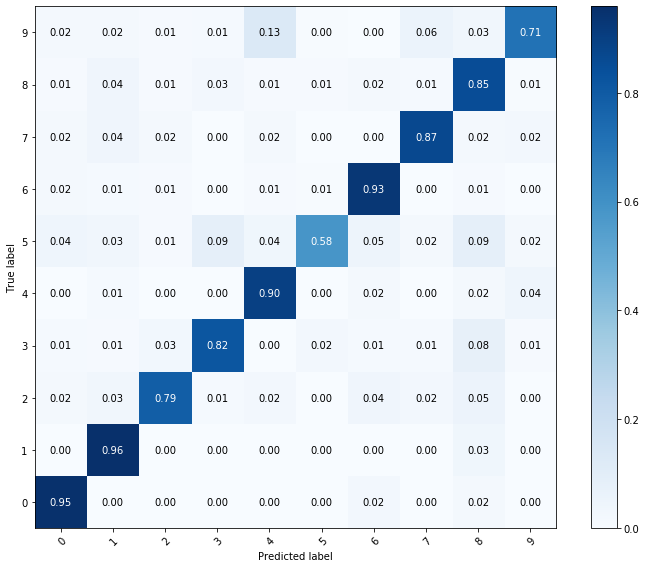

In [0]:
# TODO